#### Introduction to the Dataset:

The data set includes information about:

Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents



#### Problem Statement 
Given various features about a customer like Gender, SeniorCitizen, Partner, Dependents etc.. , predict if the customer will churn or not.

#### Task 
Prepare the Data and build a model to predict the churn of a customer.


In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(r"C:\Users\deeksha\Churn Prediction\churn_dataset.csv")

In [5]:
df.shape

(7043, 21)

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Let us check the value counts of each column to see if there are any unusual chareacters.

In [8]:
df["customerID"].value_counts()

7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64

In [9]:
df["gender"].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [10]:
df["SeniorCitizen"].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [11]:
df["Partner"].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [12]:
df["Dependents"].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

In [13]:
df["tenure"].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

In [14]:
df["PhoneService"].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [15]:
df["MultipleLines"].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [16]:
df["InternetService"].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [17]:
df["OnlineSecurity"].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [18]:
df["OnlineBackup"].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [19]:
df["DeviceProtection"].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [20]:
df["TechSupport"].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

In [21]:
df["StreamingTV"].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [22]:
df["StreamingMovies"].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [23]:
df["Contract"].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [24]:
df["PaperlessBilling"].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [25]:
df["PaymentMethod"].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [26]:
df["MonthlyCharges"].value_counts()

20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: MonthlyCharges, Length: 1585, dtype: int64

In [27]:
df["TotalCharges"].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [28]:
df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

### Dropping the Id column as it is not unnecessary

In [29]:
df.drop(["customerID"], axis = 1, inplace = True)

In [30]:
df["tenure"] = pd.to_numeric(df["tenure"], errors="coerce")

In [31]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [32]:
df["SeniorCitizen"] = df["SeniorCitizen"].astype(object)

In [33]:
num_cols=[]
cat_cols=[]

for col in df:
    if(df[col].dtype==object):
        cat_cols.append(col)
        
for col in df:
    if(df[col].dtype!=object):
        num_cols.append(col)

In [34]:
cat_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [35]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

### Visualization EDA:

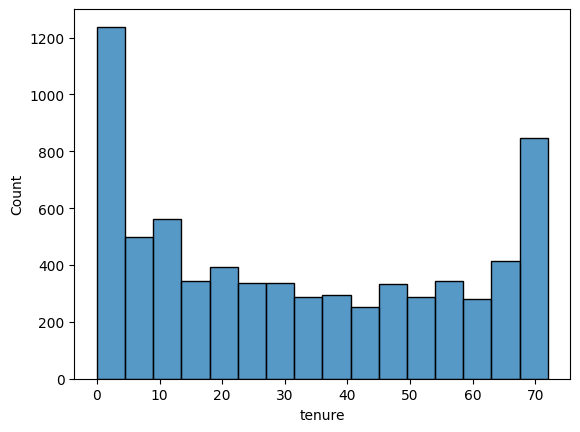

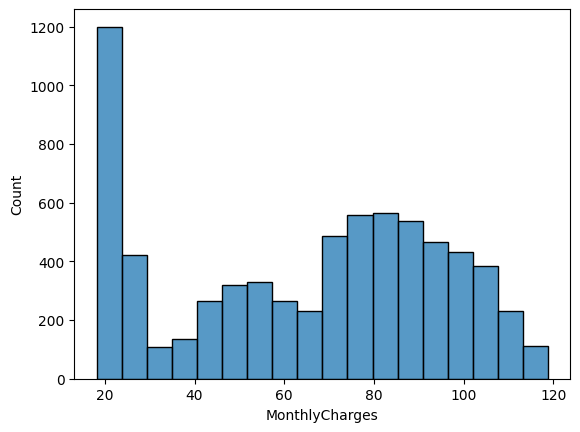

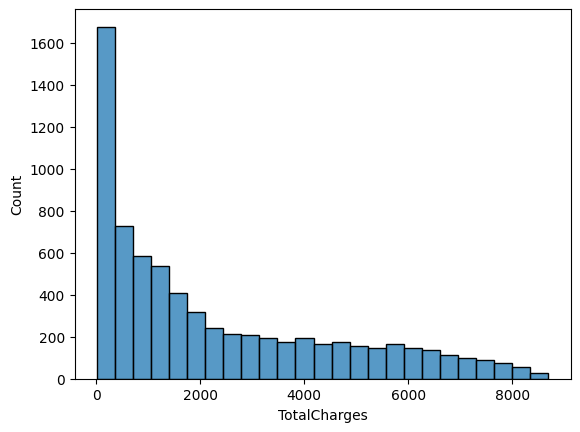

In [36]:
for col in num_cols:
    sns.histplot(df[col])
    plt.show()

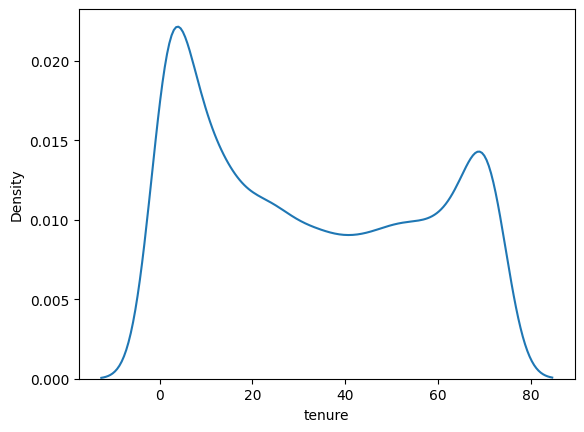

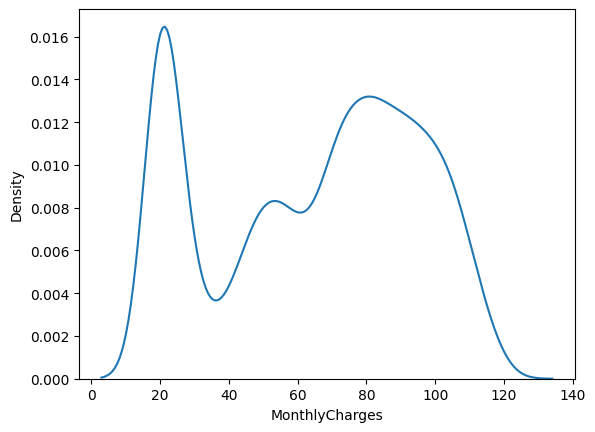

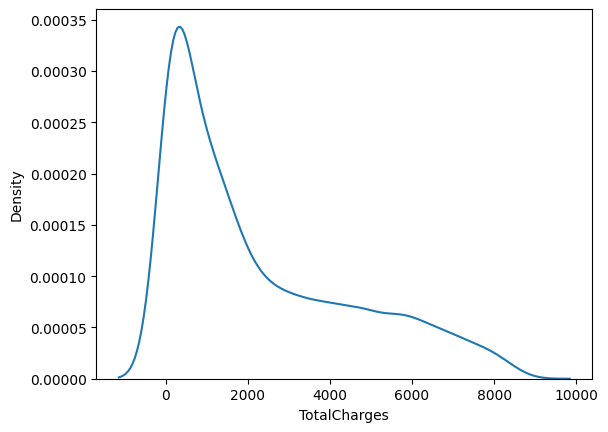

In [37]:
for col in num_cols:
    sns.kdeplot(df[col])
    plt.show()

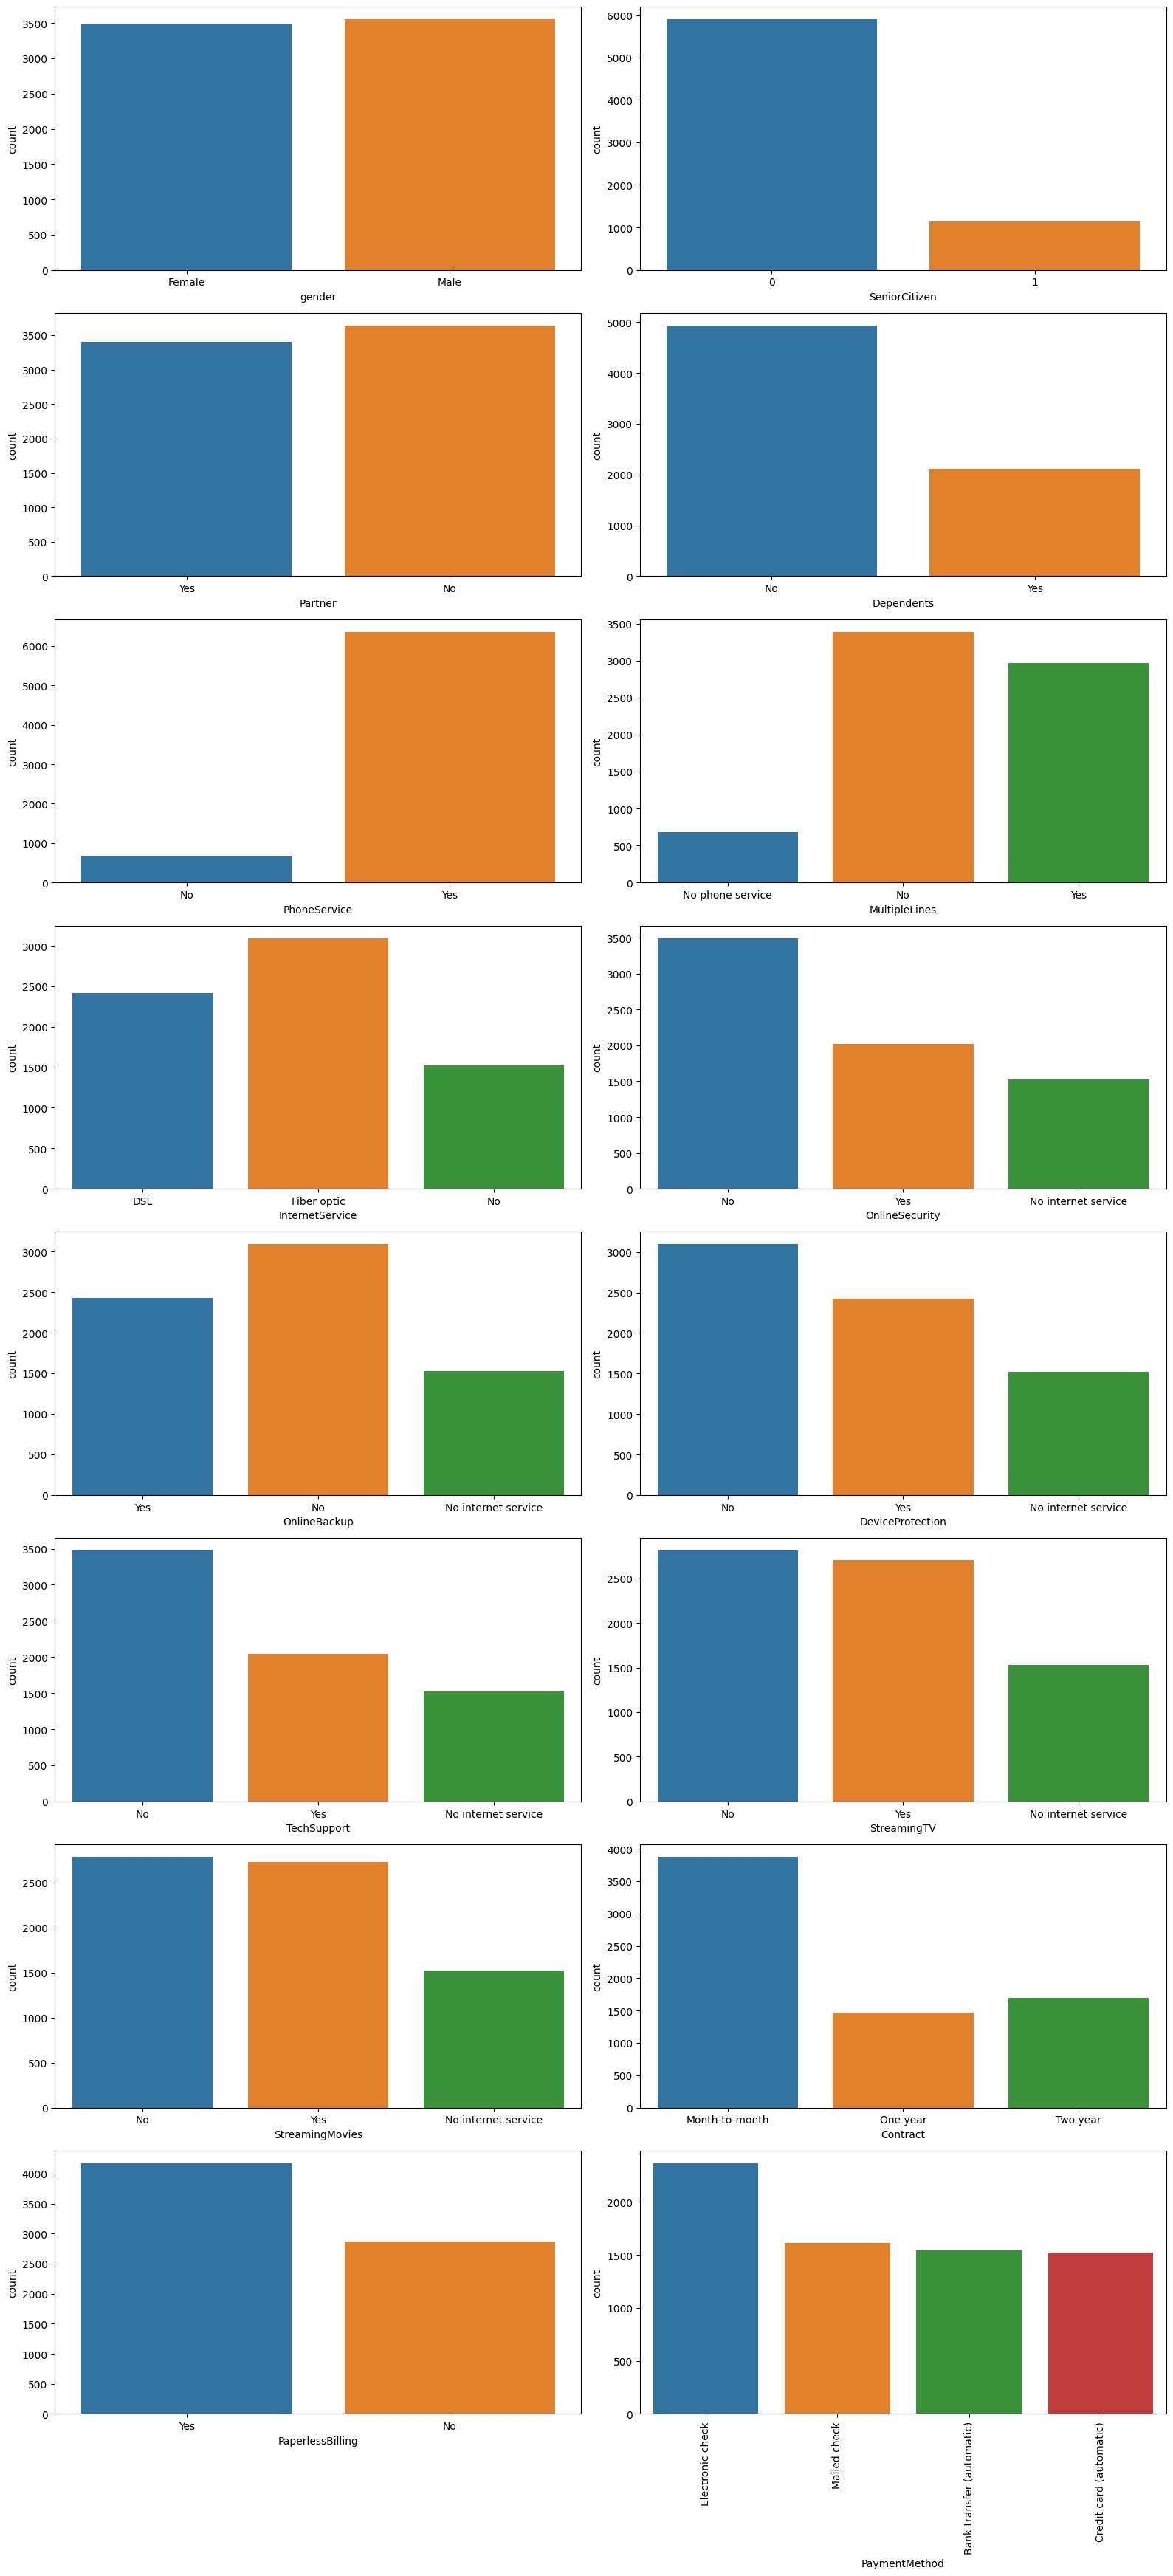

In [38]:
fig, axes = plt.subplots(8, 2, figsize = (16,35))
ax = axes.ravel()
plt.xticks(rotation=90)

for col, ax in zip(cat_cols,ax):
    
    sns.countplot(data=df, x=col, ax = ax)
    
    plt.xticks(rotation=90)

    fig.tight_layout()

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

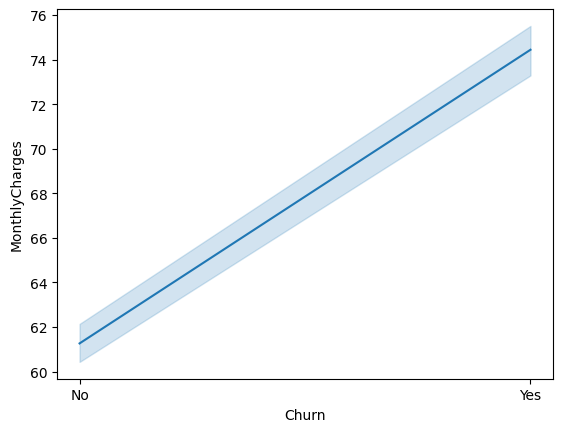

In [39]:
sns.lineplot(y=df["MonthlyCharges"], x=df["Churn"])

#### Conclusion:
People having comparatively less MonthlyCharges have high probability of leaving the brand.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


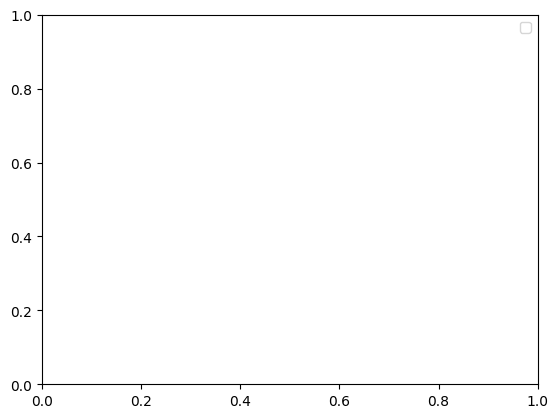

In [40]:
sns.histplot(df[df["Churn"]=="0"]["TotalCharges"], color = "c", label = "Churn: No")
sns.histplot(df[df["Churn"]=="1"]["TotalCharges"], color = "y", label = "Churn: Yes")
plt.legend()

#### Conclusion:

People with high total charges have high chances of leaving the brand

<Axes: xlabel='Churn', ylabel='TotalCharges'>

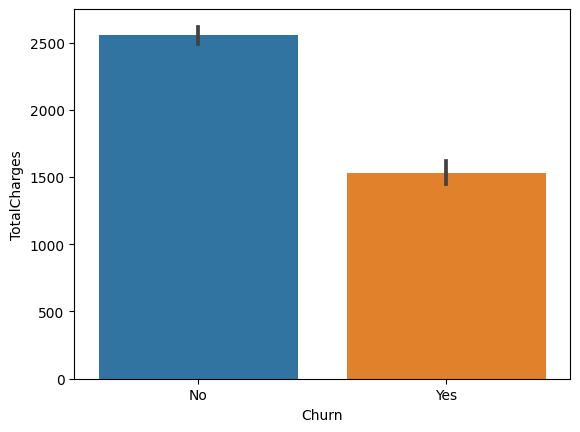

In [41]:
sns.barplot(y=df["TotalCharges"], x=df["Churn"])

#### Conclusion:
People having TotalCharges in the range of 1500 to 2500 have high probability of leaving the brand.

<Axes: xlabel='Churn', ylabel='tenure'>

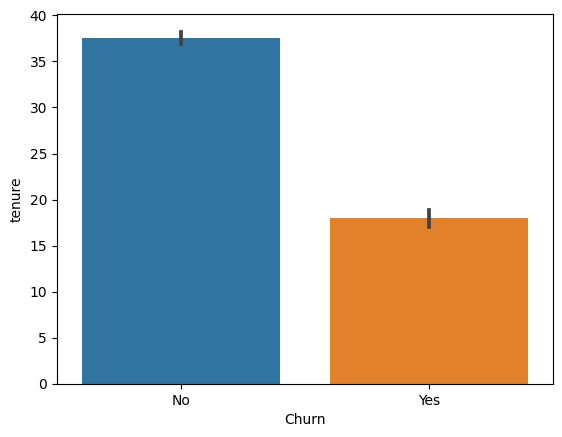

In [42]:
sns.barplot(y=df["tenure"], x=df["Churn"])

#### Conclusion:

People having the tenure in the range of 20 to 40 have high probability of leaving the brand

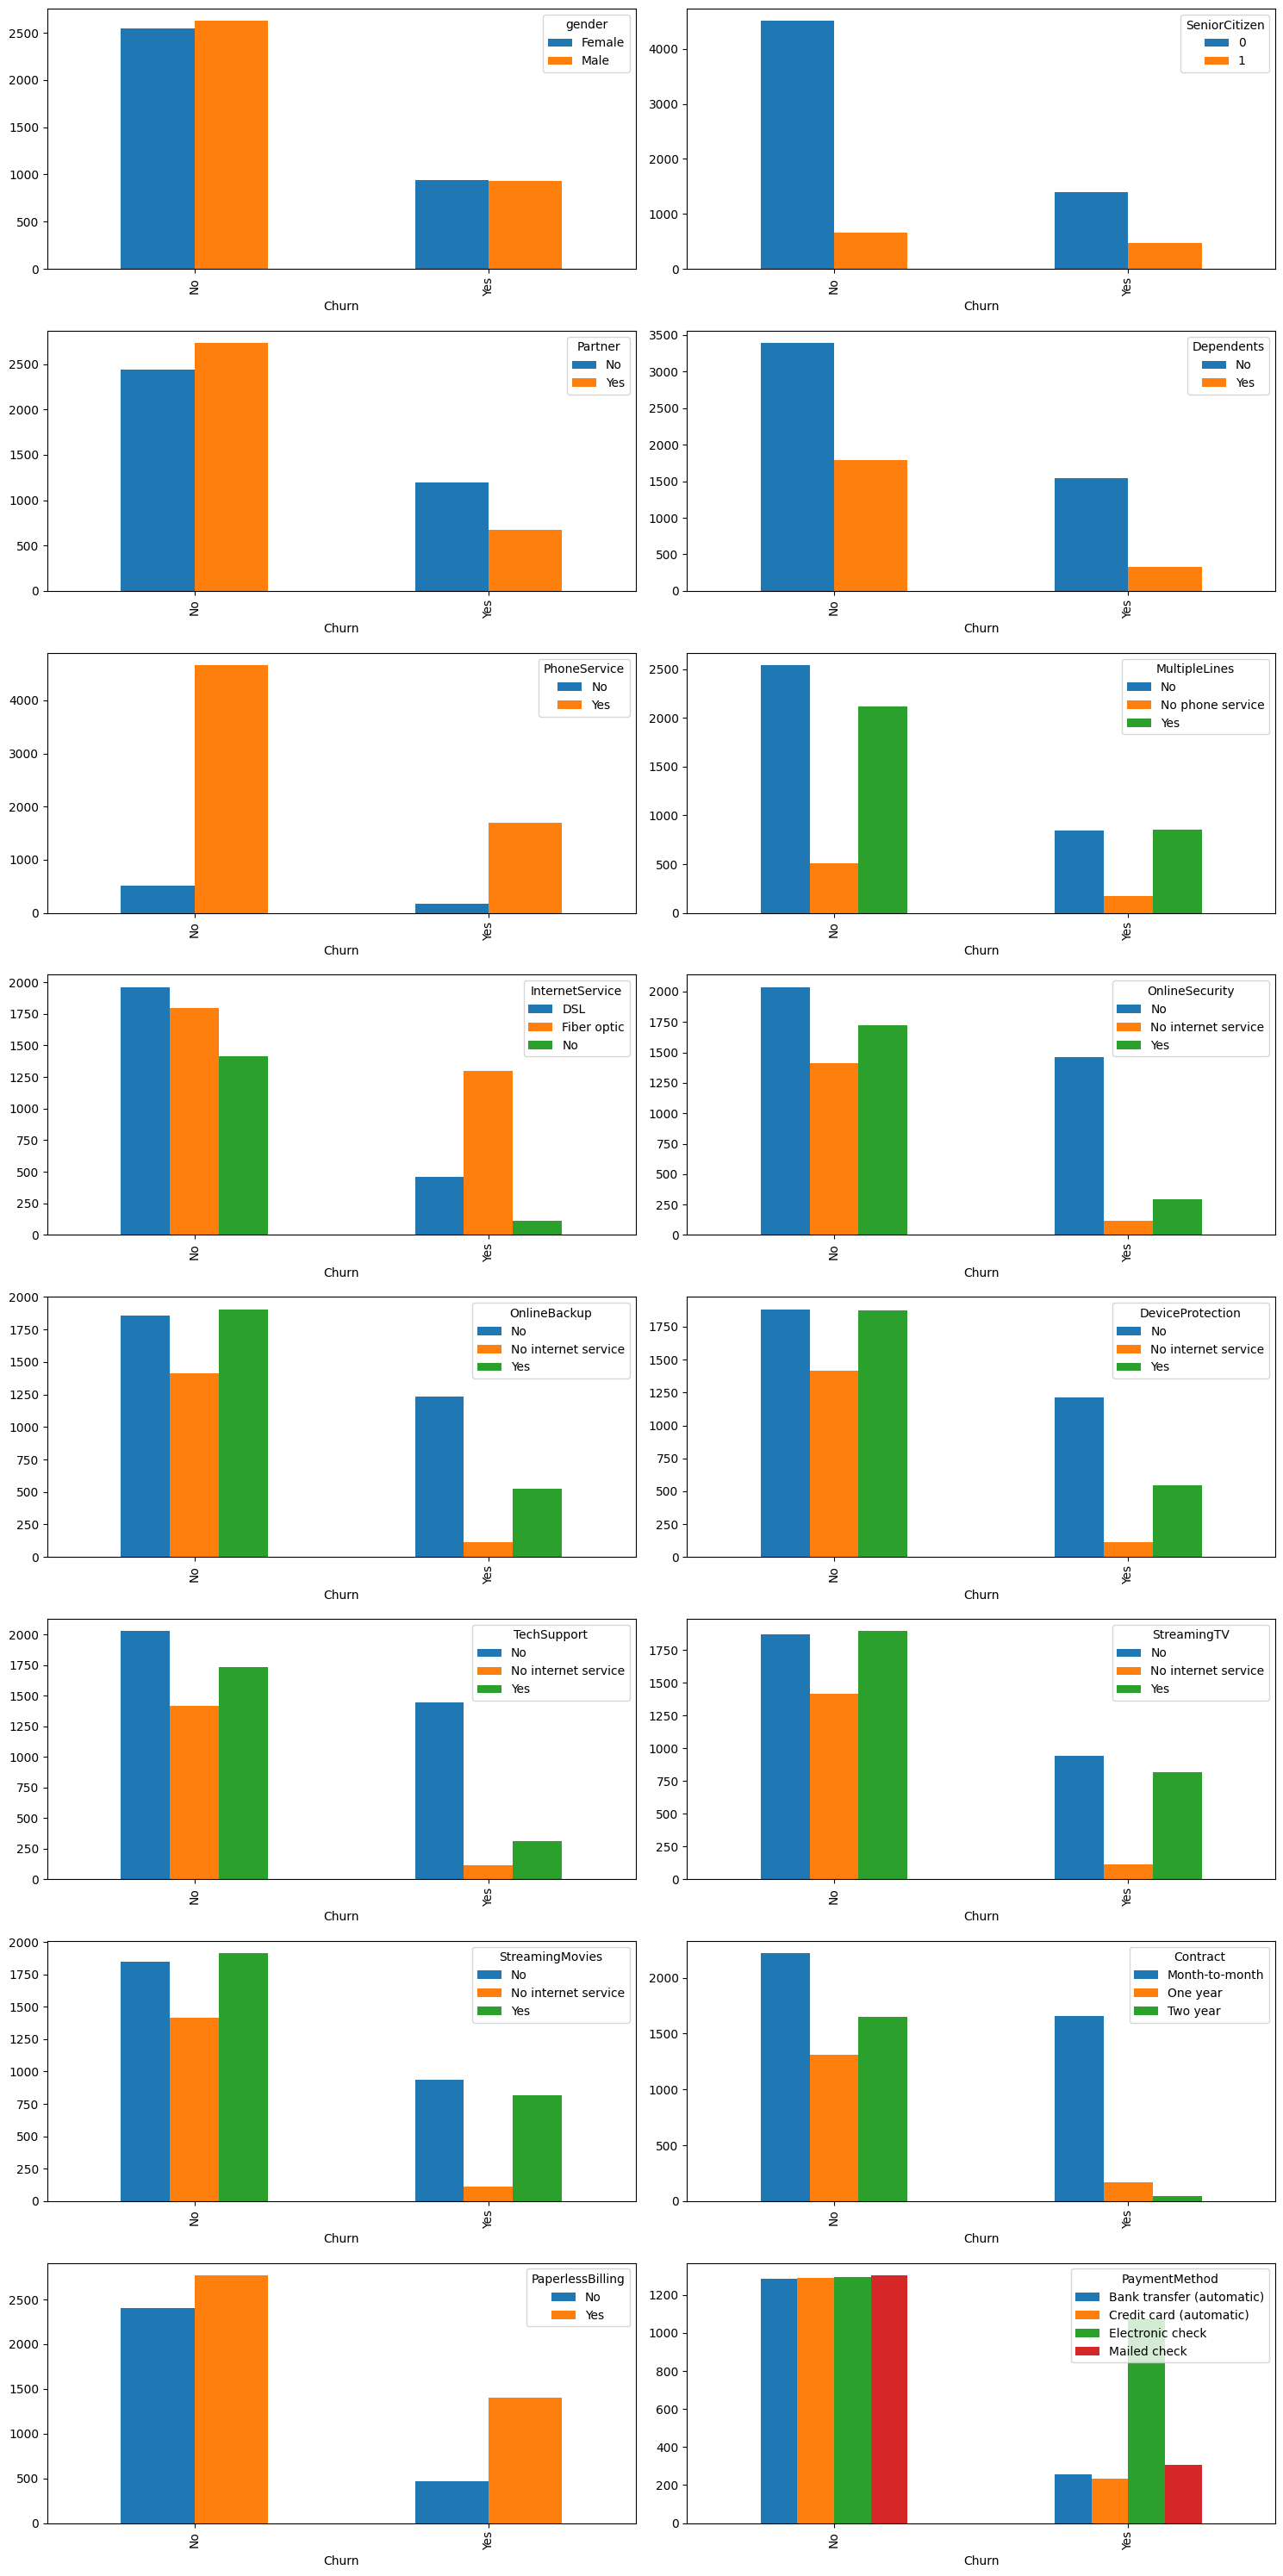

In [43]:
fig, axes = plt.subplots(8,2, figsize = (15, 30))
ax = axes.ravel()

for col, ax in zip(cat_cols, ax):
    df_cross = pd.crosstab(df["Churn"], df[col])
    df_cross.plot(kind="bar", ax = ax)
    fig.tight_layout()

#### Conclusion:

* Senior citizen have less chances of leaving the brand.

* People with partners, dependents, phone services, no multiple lines,  DSL internet services, no online security, online backup, no TechSupport, month-month contract, paperless billing have high chances of leaving.

* People with internet services have high chances of leaving compared to those who don't

* People who made payment using Electronic Check have high chances of staying

### Checking if the dataset has any null values

In [44]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

#### Let us check if TotalCharges has any outliers:fill the null values in TotalCharges with median

<Axes: >

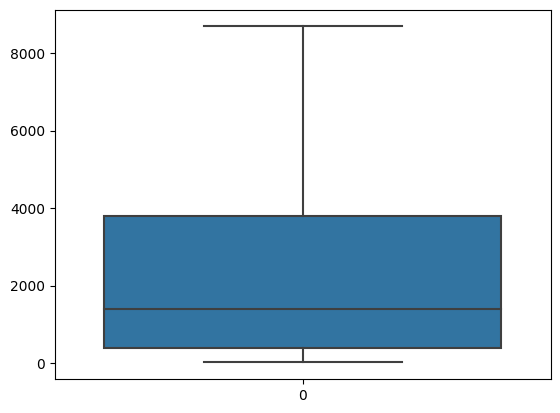

In [45]:
sns.boxplot(df["TotalCharges"])

#### Let us fill the null values in TotalCharges with mean since there are no outliers:

In [46]:
df["TotalCharges"].fillna(df["TotalCharges"].mean(), inplace = True)

In [47]:
df["TotalCharges"].isnull().sum()

0

#### Checking for outliers in all the numerical columns:

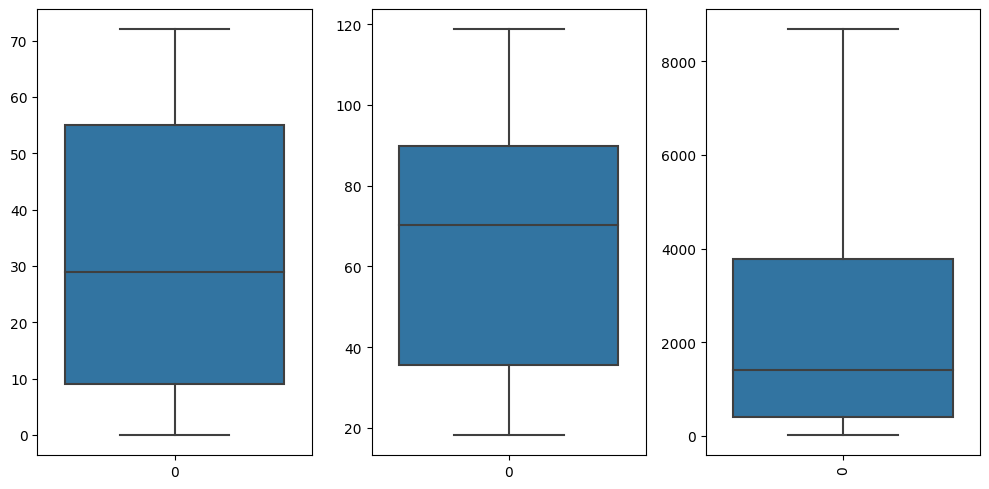

In [48]:
fig, axes = plt.subplots(1,3, figsize = (10,5))
ax = axes.ravel()

for col, ax in zip(num_cols, ax):
    
    sns.boxplot(df[col], ax = ax)
    
    plt.xticks(rotation=90)

    fig.tight_layout()

In [49]:
def find_outliers(data, col, verbose=True):

  q1 = data[col].quantile(0.25)
  q3 = data[col].quantile(0.75)
  IQR = q3 - q1
  print(q1, q3)
  lower_boundary = q1 - (1.5*IQR)
  higher_boundary = q3 + (1.5*IQR)
  outliers_df = data[(data[col]<lower_boundary) | (data[col]>higher_boundary)]
  if(verbose):
    display(outliers_df)
    print("Outliers Percentage ::", (len(outliers_df)/len(data)) * 100, "%")
  

In [50]:
find_outliers(df, "TotalCharges")

402.225 3786.6


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


Outliers Percentage :: 0.0 %


In [51]:
find_outliers(df, "tenure")

9.0 55.0


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


Outliers Percentage :: 0.0 %


In [52]:
find_outliers(df, "MonthlyCharges")

35.5 89.85


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


Outliers Percentage :: 0.0 %


In [53]:
df.corr()

C:\Users\yashw\AppData\Local\Temp\ipykernel_3940\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.247900,0.824757
MonthlyCharges,0.247900,1.000000,0.650468
TotalCharges,0.824757,0.650468,1.000000


C:\Users\yashw\AppData\Local\Temp\ipykernel_3940\3028576344.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

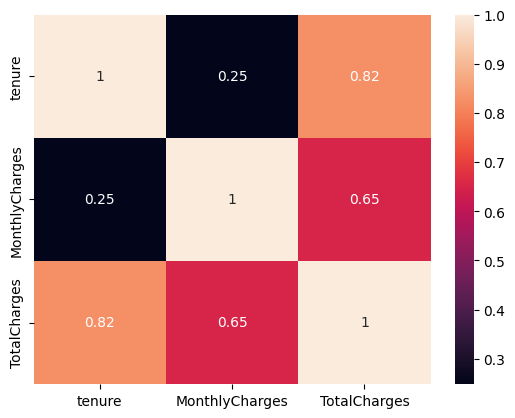

In [54]:
sns.heatmap(df.corr(), annot = True)

In [55]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


#### Calculating VIF to check multicollinearity:

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = num_cols
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df[num_cols].values, i)
                          for i in range(len(num_cols))]

vif_data

,feature,VIF
0,tenure,6.306042
1,MonthlyCharges,3.361520
2,TotalCharges,8.055643


#### Let us drop TotalCharges to avoid multicollinearity:

In [57]:
df.drop(["TotalCharges"], axis = 1, inplace = True)

In [58]:
num_cols = ['tenure', 'MonthlyCharges']

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = num_cols
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df[num_cols].values, i) for i in range(len(num_cols))]

vif_data

,feature,VIF
0,tenure,2.612607
1,MonthlyCharges,2.612607


#### The above VIF values show that dropping TotalCharges has decreased the VIF for other columns significantly.

#### Chi Square Test

1. **Null Hypothesis**: Gender and Churn has no relationship
2. **Alternate Hypothesis** : Gender and Churn has significant relationship

In [60]:
from scipy.stats import chi2_contingency

In [61]:
observed = pd.crosstab(df["Churn"], df["gender"]).values

In [62]:
observed

array([[2549, 2625],
       [ 939,  930]], dtype=int64)

In [63]:
chi_cal, p_cal, dof, expected_values = chi2_contingency(observed)

In [64]:
chi_cal

0.4840828822091383

In [65]:
p_cal

0.48657873605618596

In [66]:
dof

1

In [67]:
expected_values

array([[2562.38989067, 2611.61010933],
       [ 925.61010933,  943.38989067]])

In [68]:
chi_tab = 3.84 #at 95% confidence

In [69]:
if(chi_cal<chi_tab):
    print("Fail to reject the Null Hypothesis")
else:
    print("Reject the Null Hypothesis")

Fail to reject the Null Hypothesis


#### Anova Test:
    

1. **Null Hypothesis**: MonthlyCharges and Churn has no relationship
2. **Alternate Hypothesis** : MonthlyCharges and Churn has significant relationship

* Confidence Level: 95%
* p-val: 0.05

In [92]:
mon_no = df[df["Churn"]=="No"]["MonthlyCharges"]
mon_yes = df[df["Churn"]=="Yes"]["MonthlyCharges"]

In [93]:
from scipy.stats import f_oneway

In [94]:
f_cal, p_cal = f_oneway(mon_no, mon_yes)

In [95]:
mon_no

0        29.85
1        56.95
3        42.30
6        89.10
7        29.75
         ...  
7037     21.15
7038     84.80
7039    103.20
7040     29.60
7042    105.65
Name: MonthlyCharges, Length: 5174, dtype: float64

In [96]:
mon_yes

2        53.85
4        70.70
5        99.65
8       104.80
13      103.70
         ...  
7021     59.80
7026     44.20
7032     75.75
7034    102.95
7041     74.40
Name: MonthlyCharges, Length: 1869, dtype: float64

In [97]:
f_cal

273.4637042077133

In [98]:
p_cal

2.7066456068950115e-60

In [99]:
### between the groups (no of groups - 1)
df1 = 2-1 

In [100]:
df2 = len(df)-1

In [101]:
df1, df2

(1, 7042)

In [102]:
f_tab = 3.84

In [103]:
if(f_cal<f_tab):
    print("Fail to reject the Null Hypothesis")
else:
    print("Reject the Null Hypothesis")

Reject the Null Hypothesis


### Splitting into Target and Feature Columns:

In [104]:
X = df.drop(["Churn"], axis = 1)

In [59]:
df["Churn"] = ["0" if(x == "No") else "1" for x in df["Churn"]]

In [60]:
y = df["Churn"]
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

### Split data into train and test:

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [63]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
2663,Female,0,Yes,No,59,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),109.15
2894,Female,0,No,No,48,Yes,No,DSL,Yes,No,Yes,Yes,No,No,One year,Yes,Credit card (automatic),60.35
2265,Male,0,No,No,12,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,112.95
4908,Female,1,No,No,28,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,106.15
3621,Female,0,Yes,Yes,2,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,24.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3915,Female,0,Yes,No,59,Yes,No,Fiber optic,Yes,No,Yes,No,No,No,One year,Yes,Credit card (automatic),81.25
1428,Male,0,No,No,1,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,50.45
6537,Male,0,Yes,No,70,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,No,Credit card (automatic),115.65
4367,Male,1,Yes,No,36,Yes,No,DSL,No,No,Yes,Yes,No,No,One year,No,Credit card (automatic),54.10


In [64]:
X_train.shape

(5634, 18)

In [65]:
X_test.shape

(1409, 18)

In [66]:
y_train

2663    0
2894    1
2265    1
4908    1
3621    1
       ..
3915    0
1428    1
6537    1
4367    0
2522    0
Name: Churn, Length: 5634, dtype: object

### Pipeline:

In [67]:
from sklearn.pipeline import Pipeline

In [68]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [69]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,1


#### Encoding

In [70]:
ohe = OneHotEncoder(drop='first', handle_unknown="ignore")

In [71]:
ct = ColumnTransformer(transformers = [("ohe", ohe, ["gender", "Partner", "Dependents", "PhoneService","MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod"])], remainder = "passthrough")

#### Scaling

In [72]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

#### PCA

In [73]:
from sklearn.decomposition import PCA

In [225]:
pca_algo = PCA(n_components=6)

#### ML Models

In [226]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=6)

In [227]:
from sklearn.ensemble import RandomForestClassifier
rt = RandomForestClassifier(max_depth=9)

In [228]:
pipeline_steps = [("encoding", ct), ("scaling", sc), ("rf_model", rt)]

In [229]:
price_pipe = Pipeline(pipeline_steps)

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


### Feed the train data

In [231]:
price_pipe.fit(X_train, y_train)

Pipeline(steps=[('encoding',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('scaling', MinMaxScaler()),
                ('rf_model', RandomForestClassifier(max_depth=9))])

### Prediction for test data:

In [232]:
y_pred = price_pipe.predict(X_test)            

In [233]:
pd.DataFrame(y_pred).value_counts()

0    1124
1     285
dtype: int64

### Predictions for train data:

In [234]:
y_pred_train = price_pipe.predict(X_train)            

### Metrics for test data:

In [235]:
from sklearn.metrics import accuracy_score

In [236]:
ac = accuracy_score(y_test, y_pred) 

In [237]:
ac

0.8218594748048261

In [238]:
ac = accuracy_score(y_train, y_pred_train) 

In [239]:
ac

0.8351082712105077

### Prediction:

In [224]:
new_pt = [['Female', 0, 'No', 'No', 48, 'Yes', 'No', 'DSL', 'Yes', 'No',
       'Yes', 'Yes', 'No', 'No', 'One year', 'Yes',
       'Credit card (automatic)', 60.35]]

In [124]:
columns = X_train.columns

In [125]:
new_pt = pd.DataFrame(new_pt, columns = columns)

In [92]:
new_pt

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,Female,0,No,No,48,Yes,No,DSL,Yes,No,Yes,Yes,No,No,One year,Yes,Credit card (automatic),60.35


In [93]:
price_pipe.predict(new_pt)           

array(['0'], dtype=object)

In [94]:
rt.feature_importances_

array([0.01531326, 0.01598213, 0.0155649 , 0.00461422, 0.00483251,
       0.01237145, 0.08442287, 0.00891768, 0.01268154, 0.04457365,
       0.01476334, 0.02088932, 0.01208096, 0.01243864, 0.0140483 ,
       0.03494418, 0.01637882, 0.01146553, 0.00315134, 0.01176595,
       0.05195601, 0.1024856 , 0.0215014 , 0.01004733, 0.05369455,
       0.00917202, 0.01647897, 0.23990707, 0.12355645])

<Axes: >

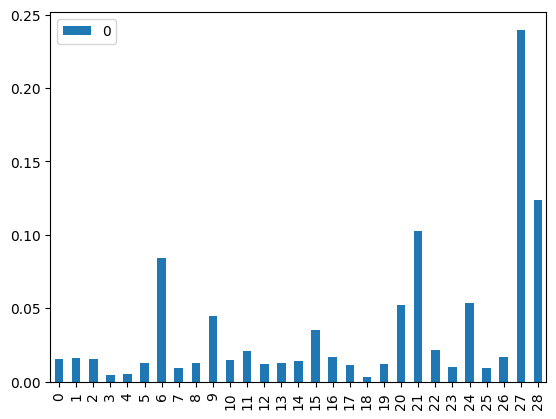

In [95]:
pd.DataFrame(rt.feature_importances_).plot(kind="bar")

### Saving the model:

In [96]:
import joblib

In [97]:
joblib.dump(price_pipe,"laptop_price_prediction.pkl")

['laptop_price_prediction.pkl']